## Predictive Analysis of Market Trends to Predict Stock Price   

## Pre Processing Of Data

In [287]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [288]:
def splitDate(df):
    X_date = []
    for d in df.index:
        d = str(d).split(' ')[0]
        x = []
        x.append(int(d.split('-')[0]))
        x.append(int(d.split('-')[1]))
        x.append(int(d.split('-')[2]))
        X_date.append(x)
    
    X_date = np.array(X_date,dtype=np.int64) 
    return [X_date[:,:1],X_date[:,1:2],X_date[:,2:3]]

In [289]:
#Function to read data from csv file and create a dataframe
def getDataSplitInTrainTest(fname,ftrends):
    #Read into dataframe
    df = pd.read_csv(fname,index_col='Date',
                     parse_dates=True,na_values=['nan'])
    
       
    
    df['Date'] = pd.to_datetime(df.index).astype(np.int64)
    df['Year'],df['Month'],df['Day'] = splitDate(df)
    
    df_trends = pd.read_csv(ftrends,index_col='Date',parse_dates=True)
        
    #Stat and End Date for train and test data respectivly
    #Train Data
    train_start_date = '2016-10-01'
    train_end_date = '2016-11-30'
    train_dates = pd.date_range(train_start_date,train_end_date)
    
    #Test Data
    test_start_date = '2016-12-01'    
    test_end_date = '2016-12-30'
    test_dates = pd.date_range(test_start_date,test_end_date)
    
    #Our dataframe wil have date as index and one column as open price
    df_train = pd.DataFrame(index=train_dates) 
    df_test = pd.DataFrame(index=test_dates) 

    #Join
    df_train = df_train.join(df)
    df_test = df_test.join(df)
    
    #drop nan
    df_train = df_train.dropna()
    df_test = df_test.dropna()
    
    #For trends value
    df_train1 = df_train.join(df_trends).dropna()
    df_test1 = df_test.join(df_trends).dropna()
    
    #Return df_train and df_train as a tuple
    return (df_train1,df_test1)
    
#Calling function to get processed data
df_train,df_test = getDataSplitInTrainTest('AAPL.csv','TRENDS.csv')

## Data Visualization

#### Train Data

In [290]:
#First Five samples
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,Trend
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800.0,1.475453e+18,2016.0,10.0,3.0,66
2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800.0,1.475539e+18,2016.0,10.0,4.0,66
2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100.0,1.475626e+18,2016.0,10.0,5.0,66
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.915863,28779300.0,1.475712e+18,2016.0,10.0,6.0,66
2016-10-07,114.309998,114.559998,113.510002,114.059998,112.082916,24358400.0,1.475798e+18,2016.0,10.0,7.0,66


### Test Data

In [291]:
#First Five samples
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,Trend
2016-12-01,110.370003,110.940002,109.029999,109.489998,108.144531,37086900.0,1.480550e+18,2016.0,12.0,1.0,59
2016-12-02,109.169998,110.089996,108.849998,109.900002,108.549500,26528000.0,1.480637e+18,2016.0,12.0,2.0,59
2016-12-05,110.000000,110.029999,108.250000,109.110001,107.769203,34324500.0,1.480896e+18,2016.0,12.0,5.0,54
2016-12-06,109.500000,110.360001,109.190002,109.949997,108.598877,26195500.0,1.480982e+18,2016.0,12.0,6.0,54
2016-12-07,109.260002,111.190002,109.160004,111.029999,109.665604,29998700.0,1.481069e+18,2016.0,12.0,7.0,54


### Plotting Graph

In [292]:
def plotDataframe(df,title):
    ax = df.plot(title=title,fontsize=10)
    ax.set_xlabel("Data")
    ax.set_ylabel("Price")
    plt.show()   

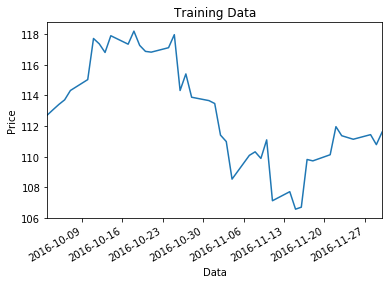

In [293]:
#Plot
plotDataframe(df_train['Open'],"Training Data")

## Splitting dataframe into features and target (X,y)

In [294]:
#Train
#X_train = np.asarray([pd.to_datetime(df_train.index).astype(np.int64),df_train['Trend']])
X_train = df_train[['Year','Month','Day','Trend']]
y_train = df_train['Open']

#test
#X_test = np.array([pd.to_datetime(df_test.index).astype(np.int64),df_test['Trend']])
X_test = df_test[['Year','Month','Day','Trend']]
y_test = df_test['Open']


from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# ML Algorithm

### Linear Regression

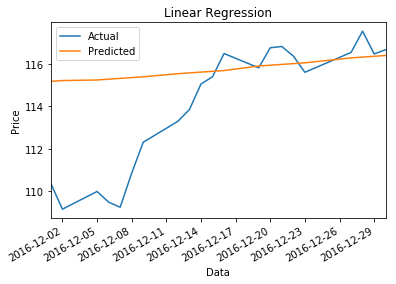

In [295]:
from sklearn.linear_model import LinearRegression,Ridge
model_linear_reg = LinearRegression() 
model_linear_reg.fit(X_train,y_train)

df_linear_reg = pd.DataFrame(index=df_test.index)
df_linear_reg['Actual'] = y_test
df_linear_reg['Predicted'] = model_linear_reg.predict(X_test)
plotDataframe(df_linear_reg,"Linear Regression")

## SGD Regrssion

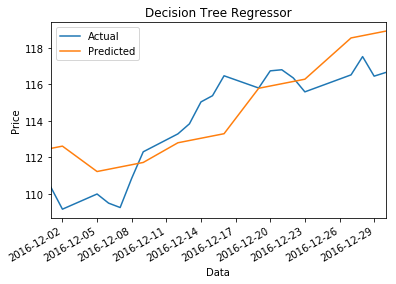

In [296]:
from sklearn.linear_model import SGDRegressor
model_dt = SGDRegressor(max_iter=1000,alpha=0.0001)
model_dt.fit(X_train,y_train)
#print(r2_score(y_test,model_dt.predict(X_test)))
df_dt = pd.DataFrame(index=df_test.index)
df_dt['Actual'] = y_test
df_dt['Predicted'] = model_dt.predict(X_test)
plotDataframe(df_dt,"Decision Tree Regressor")

## Decision Tree

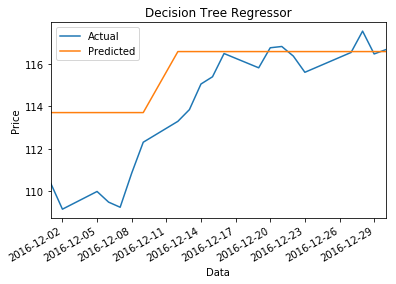

In [297]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=2)
model_dt.fit(X_train,y_train)
#print(r2_score(y_test,model_dt.predict(X_test)))
df_dt = pd.DataFrame(index=df_test.index)
df_dt['Actual'] = y_test
df_dt['Predicted'] = model_dt.predict(X_test)
plotDataframe(df_dt,"Decision Tree Regressor")

### Random Forest Regressor

-0.0696751945532


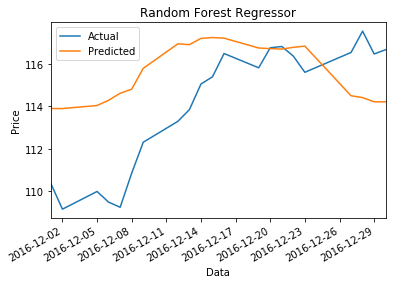

In [298]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=45)
model_rf.fit(X_train,y_train)
print(r2_score(y_test,model_rf.predict(X_test)))
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model_rf.predict(X_test)
plotDataframe(df_rf,"Random Forest Regressor")

## SVR

In [299]:
from sklearn.svm import SVR

### SVR with Linear Kernel

0.15131705075


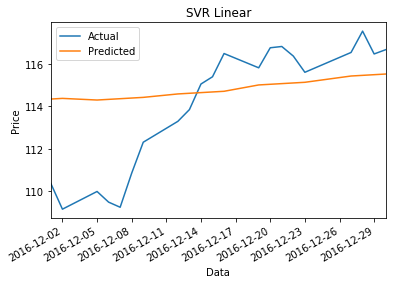

In [300]:
model_svr_linear = SVR(kernel= 'linear')
model_svr_linear.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
print(model_svr_linear.score(X_test,y_test))
df_rf['Actual'] = y_test
df_rf['Predicted'] = model_svr_linear.predict(X_test)
plotDataframe(df_rf,"SVR Linear")

### SVR Rbf

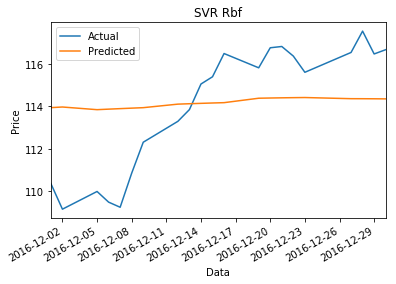

In [301]:
model = SVR(kernel= 'rbf')
model.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model.predict(X_test)
plotDataframe(df_rf,"SVR Rbf")

### Neural Network

In [302]:
from keras.models import Sequential
from keras.layers import Dense

In [303]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae','accuracy'])
model.fit(X_train,
         y_train,
         batch_size=1,
         epochs=0)
model.evaluate(X_test,y_test,batch_size=1)

 1/21 [>.............................] - ETA: 0s

[13010.660109747023, 114.02716318766277, 0.0]